In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
dataset = pd.read_csv("data.csv" , delimiter='\t')

In [ ]:
dataset.head(10)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
5,1,18,6116,1,28,3193,2,2,12542,1,...,2,1,1,4,1,70,2,1,4,NaN
6,1,20,4325,1,34,4009,2,38,3604,3,...,2,1,1,7,2,60,2,1,4,Mechatronics engeenerieng
7,1,34,4796,1,9,2618,1,39,5823,1,...,2,1,1,2,2,60,1,1,2,Music
8,4,4,3470,4,14,2139,3,1,11043,4,...,1,1,1,12,2,70,2,1,4,Psychology
9,3,38,5187,2,28,2600,4,9,2015,1,...,2,1,1,2,2,60,2,1,3,computer programming


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [ ]:
# Check for duplicates on each row.
dataset.duplicated().value_counts()

False    39775
dtype: int64

In [ ]:
# Check for unique values.
dataset.nunique()


Q1A               4
Q1I              42
Q1E           10879
Q2A               4
Q2I              42
              ...  
race              7
voted             3
married           4
familysize       28
major          5309
Length: 172, dtype: int64

In [ ]:
columns  = dataset.columns
print('Attributes',columns)


Attributes Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)


In [ ]:
for column in columns:
    print(column)

Q1A
Q1I
Q1E
Q2A
Q2I
Q2E
Q3A
Q3I
Q3E
Q4A
Q4I
Q4E
Q5A
Q5I
Q5E
Q6A
Q6I
Q6E
Q7A
Q7I
Q7E
Q8A
Q8I
Q8E
Q9A
Q9I
Q9E
Q10A
Q10I
Q10E
Q11A
Q11I
Q11E
Q12A
Q12I
Q12E
Q13A
Q13I
Q13E
Q14A
Q14I
Q14E
Q15A
Q15I
Q15E
Q16A
Q16I
Q16E
Q17A
Q17I
Q17E
Q18A
Q18I
Q18E
Q19A
Q19I
Q19E
Q20A
Q20I
Q20E
Q21A
Q21I
Q21E
Q22A
Q22I
Q22E
Q23A
Q23I
Q23E
Q24A
Q24I
Q24E
Q25A
Q25I
Q25E
Q26A
Q26I
Q26E
Q27A
Q27I
Q27E
Q28A
Q28I
Q28E
Q29A
Q29I
Q29E
Q30A
Q30I
Q30E
Q31A
Q31I
Q31E
Q32A
Q32I
Q32E
Q33A
Q33I
Q33E
Q34A
Q34I
Q34E
Q35A
Q35I
Q35E
Q36A
Q36I
Q36E
Q37A
Q37I
Q37E
Q38A
Q38I
Q38E
Q39A
Q39I
Q39E
Q40A
Q40I
Q40E
Q41A
Q41I
Q41E
Q42A
Q42I
Q42E
country
source
introelapse
testelapse
surveyelapse
TIPI1
TIPI2
TIPI3
TIPI4
TIPI5
TIPI6
TIPI7
TIPI8
TIPI9
TIPI10
VCL1
VCL2
VCL3
VCL4
VCL5
VCL6
VCL7
VCL8
VCL9
VCL10
VCL11
VCL12
VCL13
VCL14
VCL15
VCL16
education
urban
gender
engnat
age
screensize
uniquenetworklocation
hand
religion
orientation
race
voted
married
familysize
major


Data Preprocessing

In [ ]:
# Extract columns matching the pattern "Q<number>A"
pattern = r'^Q\d+A$'
scale_column = [column for column in dataset.columns if re.match(pattern, column)]
# Create a new DataFrame with the extracted columns
extracted_data = dataset[scale_column]

In [ ]:
extracted_data

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,2,4,1,2,4,4,2,3,1,3
39771,3,4,3,4,3,4,4,4,3,4,...,3,4,3,3,3,4,3,3,3,4
39772,2,1,2,1,1,1,1,1,2,1,...,2,1,1,1,1,1,2,1,1,1
39773,3,1,2,2,3,3,3,4,3,1,...,4,2,3,2,1,2,3,2,4,3


In [ ]:
#Check if theres any missing or empty item
extracted_data.isnull().sum()

Q1A     0
Q2A     0
Q3A     0
Q4A     0
Q5A     0
Q6A     0
Q7A     0
Q8A     0
Q9A     0
Q10A    0
Q11A    0
Q12A    0
Q13A    0
Q14A    0
Q15A    0
Q16A    0
Q17A    0
Q18A    0
Q19A    0
Q20A    0
Q21A    0
Q22A    0
Q23A    0
Q24A    0
Q25A    0
Q26A    0
Q27A    0
Q28A    0
Q29A    0
Q30A    0
Q31A    0
Q32A    0
Q33A    0
Q34A    0
Q35A    0
Q36A    0
Q37A    0
Q38A    0
Q39A    0
Q40A    0
Q41A    0
Q42A    0
dtype: int64

In [ ]:
#Subtract 1 from all the response to change the scale from 1 to 4 to 0 to 3
def sub(data):
    return data.subtract(1,axis=1)
regularized_dataset=sub(extracted_data)

# Declare the question key to generate the dataset for each dataset
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Depression_keys = []
for i in DASS_keys["Depression"]:
    Depression_keys.append('Q'+str(i)+'A')
Stress_keys = []
for i in DASS_keys["Stress"]:
    Stress_keys.append('Q'+str(i)+'A')
Anxiety_keys = []
for i in DASS_keys["Anxiety"]:
    Anxiety_keys.append('Q'+str(i)+'A')
depression_dataset= regularized_dataset.filter(Depression_keys)
stress_dataset = regularized_dataset.filter(Stress_keys)
anxiety_dataset = regularized_dataset.filter(Anxiety_keys)

In [ ]:
#Obtain the total score for each dataset here
def scores(data):
    col=list(data)
    data['Total_Count']=data[col].sum(axis=1)
    return data
depression_dataset=scores(depression_dataset)
stress_dataset=scores(stress_dataset)
anxiety_dataset=scores(anxiety_dataset)

Display the newly generated datasets

In [ ]:
depression_dataset.head(10)


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,13
6,1,3,3,1,3,1,3,2,1,3,2,3,3,2,31
7,0,2,0,0,0,0,0,0,1,0,0,0,0,1,4
8,2,2,2,3,3,2,2,2,3,3,3,3,2,3,35
9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,42


In [ ]:
stress_dataset.head(10)

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29
5,0,0,2,0,1,2,0,0,0,2,0,3,2,0,12
6,0,0,2,0,1,1,1,0,0,1,1,3,1,3,14
7,0,1,0,1,0,1,1,0,1,0,0,0,0,1,6
8,3,3,3,3,3,2,3,3,1,3,1,3,1,1,33
9,2,3,3,3,3,3,0,2,3,3,1,3,2,3,34


In [ ]:
anxiety_dataset.head(10)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40
5,0,0,0,2,1,0,1,0,0,0,1,1,0,0,6
6,0,2,2,2,2,0,2,2,1,1,2,1,1,1,19
7,0,0,1,0,1,0,1,0,1,0,0,0,0,0,4
8,3,3,3,3,3,3,3,3,1,3,2,3,3,3,39
9,1,0,2,3,1,3,3,0,2,3,2,3,3,2,28


Depression Dataset

In [ ]:
#Declaring function to assign the label
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>=28:
        return 'Extremely Severe'

#Apply the condition and drop the "Total_Count" column
depression_dataset['Label']=depression_dataset['Total_Count'].apply(condition)
final_depression_dataset = depression_dataset.drop(columns=['Total_Count'])
final_depression_dataset.head(10)


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Label
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,Extremely Severe
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,Mild
6,1,3,3,1,3,1,3,2,1,3,2,3,3,2,Extremely Severe
7,0,2,0,0,0,0,0,0,1,0,0,0,0,1,Normal
8,2,2,2,3,3,2,2,2,3,3,3,3,2,3,Extremely Severe
9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Extremely Severe


Extremely Severe    13577
Severe               6477
Moderate             7079
Mild                 3786
Normal               8856
Name: Label, dtype: int64


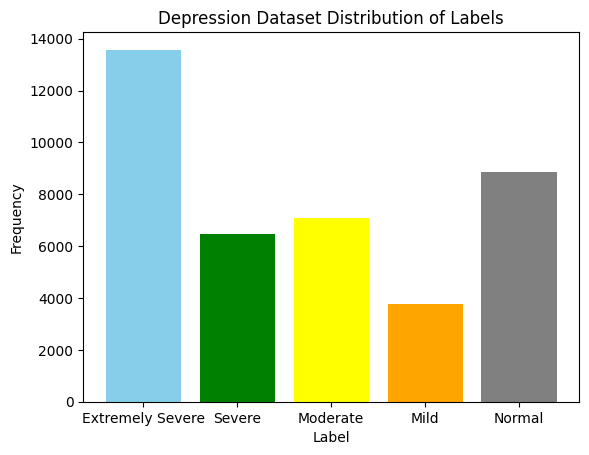

In [ ]:
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

# Count the frequency of each label
label_counts = final_depression_dataset['Label'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)

# Plot the bar chart
# plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Depression Dataset Distribution of Labels')

# Show the plot
plt.show()

Stress Dataset

In [ ]:
#Declaring function to assign the label
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

#Apply the condition and drop the "Total_Count" column
stress_dataset['Label']=stress_dataset['Total_Count'].apply(condition)
final_stress_dataset = stress_dataset.drop(columns=['Total_Count'])
final_stress_dataset.head(10)

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Label
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,Severe
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,Mild
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,Mild
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,Severe
5,0,0,2,0,1,2,0,0,0,2,0,3,2,0,Normal
6,0,0,2,0,1,1,1,0,0,1,1,3,1,3,Normal
7,0,1,0,1,0,1,1,0,1,0,0,0,0,1,Normal
8,3,3,3,3,3,2,3,3,1,3,1,3,1,1,Severe
9,2,3,3,3,3,3,0,2,3,3,1,3,2,3,Extremely Severe


Extremely Severe     5749
Severe               8575
Moderate             8730
Mild                 4921
Normal              11800
Name: Label, dtype: int64


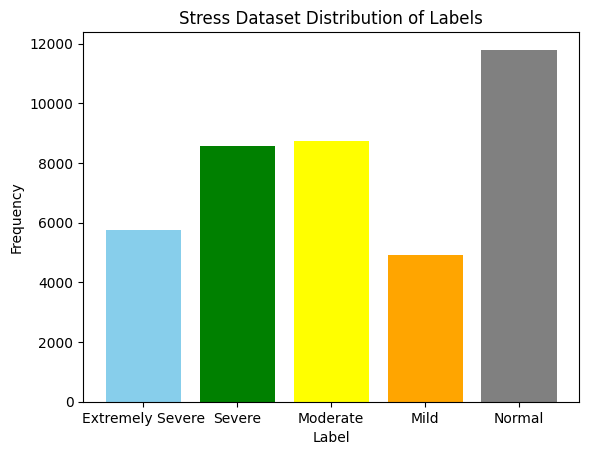

In [ ]:
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

# Count the frequency of each label
label_counts = final_stress_dataset['Label'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Stress Dataset Distribution of Labels')

# Show the plot
plt.show()

Anxiety Dataset

In [ ]:
#Declaring function to assign the label
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

#Apply the condition and drop the "Total_Count" column
anxiety_dataset['Label']=anxiety_dataset['Total_Count'].apply(condition)
final_anxiety_dataset = anxiety_dataset.drop(columns=['Total_Count'])
final_anxiety_dataset.head(10)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Label
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,Severe
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,Moderate
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,Severe
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,Extremely Severe
5,0,0,0,2,1,0,1,0,0,0,1,1,0,0,Normal
6,0,2,2,2,2,0,2,2,1,1,2,1,1,1,Severe
7,0,0,1,0,1,0,1,0,1,0,0,0,0,0,Normal
8,3,3,3,3,3,3,3,3,1,3,2,3,3,3,Extremely Severe
9,1,0,2,3,1,3,3,0,2,3,2,3,3,2,Extremely Severe


Extremely Severe    14122
Severe               6113
Moderate             7048
Mild                 2764
Normal               9728
Name: Label, dtype: int64


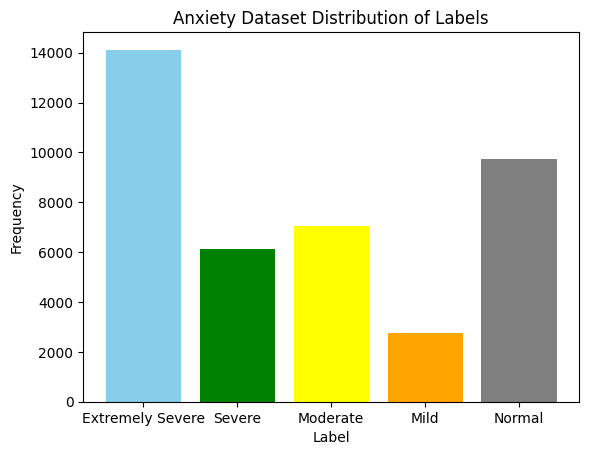

In [ ]:
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

# Count the frequency of each label
label_counts = final_anxiety_dataset['Label'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Anxiety Dataset Distribution of Labels')

# Show the plot
plt.show()

Generating the training and test set for each Dataset
Depression Dataset

In [ ]:
#Seperate the data and labels
depression_labels = final_depression_dataset["Label"]
depression_X = final_depression_dataset.drop(columns=["Label"])

In [ ]:
depression_labels

0                  Severe
1                  Severe
2        Extremely Severe
3                Moderate
4        Extremely Severe
               ...       
39770    Extremely Severe
39771    Extremely Severe
39772              Normal
39773            Moderate
39774              Severe
Name: Label, Length: 39775, dtype: object

In [ ]:
depression_X

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,3,2,3,3,2,2,3,3,3,3,2
39771,2,2,3,3,3,2,3,3,3,3,3,2,3,3
39772,1,0,0,1,0,0,0,1,0,1,0,0,0,0
39773,1,2,0,3,0,1,1,1,2,1,1,0,1,2


In [ ]:
#Encode the labels
encoder = LabelEncoder()
encoded_depression_label = encoder.fit_transform(depression_labels)

# Define the desired label values
desired_label_values = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']
encoder.classes_ = desired_label_values

In [ ]:
dict(zip(encoder.classes_,range(len(encoder.classes_))))

{'Extremely Severe': 0, 'Severe': 1, 'Moderate': 2, 'Mild': 3, 'Normal': 4}

In [ ]:
encoded_depression_label

array([4, 4, 0, ..., 3, 2, 4])

In [ ]:
#Get the training and test set from the depression dataset
dp_X_Train, dp_X_Test, dp_Y_Train, dp_Y_Test = train_test_split(depression_X, encoded_depression_label, test_size=0.3, random_state= 30)

In [ ]:
dp_X_Train

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A
17440,1,2,2,2,2,3,1,1,0,2,2,2,1,1
15278,2,2,2,2,2,2,2,1,1,2,2,2,3,2
36101,2,3,2,3,2,1,2,3,3,1,1,3,2,1
38289,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31464,2,3,2,3,2,3,1,2,3,3,3,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30517,0,1,0,2,2,1,1,2,1,1,1,1,1,1
919,1,1,1,1,1,1,0,1,1,1,1,1,1,1
33268,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4517,0,0,1,1,0,0,0,1,1,1,0,0,0,1


In [ ]:
dp_Y_Train

array([4, 4, 0, ..., 3, 3, 0])

In [ ]:
dp_X_Test

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A
20077,1,2,1,2,0,2,1,1,1,0,1,1,2,1
13446,1,3,1,2,2,2,1,1,2,1,1,0,2,3
30080,1,1,1,3,1,1,1,2,2,2,1,2,1,2
15464,1,3,2,1,3,3,3,2,0,2,3,1,3,1
31023,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,1,2,2,1,1,2,2,1,1,1,3,3,2,2
35615,1,0,1,0,3,0,1,1,1,3,0,1,0,2
32300,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2392,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dp_Y_Test

array([2, 4, 4, ..., 0, 3, 3])

In [ ]:
# Calculate the count of each unique label
unique_labels, label_counts = np.unique(dp_Y_Test, return_counts=True)
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

print("Test data distribution")
# Print the label counts
for label, count in zip(unique_labels, label_counts):
    print(f"Label: {label}, Count: {count}")

Test data distribution
Label: 0, Count: 4051
Label: 1, Count: 1153
Label: 2, Count: 2159
Label: 3, Count: 2662
Label: 4, Count: 1908


In [ ]:
# Calculate the count of each unique label
unique_labels, label_counts = np.unique(dp_Y_Train, return_counts=True)
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

print("Training data distribution")
# Print the label counts
for label, count in zip(unique_labels, label_counts):
    print(f"Label: {label}, Count: {count}")

Training data distribution
Label: 0, Count: 9526
Label: 1, Count: 2633
Label: 2, Count: 4920
Label: 3, Count: 6194
Label: 4, Count: 4569


Stress Dataset

In [ ]:
#Seperate the data and labels
stress_labels = final_stress_dataset["Label"]
stress_X = final_stress_dataset.drop(columns=["Label"])

In [ ]:
stress_labels

0        Extremely Severe
1                  Severe
2                    Mild
3                    Mild
4                  Severe
               ...       
39770                Mild
39771    Extremely Severe
39772              Normal
39773              Severe
39774                Mild
Name: Label, Length: 39775, dtype: object

In [ ]:
stress_X

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,1,1,2,1,1,1,1,2,1,2,0,1,0,1
39771,2,3,3,3,3,3,2,3,2,2,2,2,2,2
39772,1,0,0,0,0,0,0,0,1,1,0,1,0,1
39773,2,2,3,2,2,3,2,3,3,2,2,3,2,2


In [ ]:
#Encode the labels
encoder = LabelEncoder()
encoded_stress_label = encoder.fit_transform(stress_labels)

# Define the desired label values
desired_label_values = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']
encoder.classes_ = desired_label_values

In [ ]:
dict(zip(encoder.classes_,range(len(encoder.classes_))))

{'Extremely Severe': 0, 'Severe': 1, 'Moderate': 2, 'Mild': 3, 'Normal': 4}

In [ ]:
encoded_stress_label

array([0, 4, 1, ..., 3, 4, 1])

In [ ]:
#Get the training and test set from the stress dataset
st_X_Train, st_X_Test, st_Y_Train, st_Y_Test = train_test_split(stress_X, encoded_stress_label, test_size=0.3, random_state= 30)

In [ ]:
st_X_Train

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A
17440,2,1,2,2,1,3,0,1,1,2,2,1,1,1
15278,0,1,2,1,1,1,1,1,1,1,2,1,0,2
36101,2,2,0,3,1,2,3,2,2,2,0,1,1,2
38289,0,0,1,0,0,0,0,0,0,0,0,1,0,0
31464,0,2,2,0,0,0,1,1,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30517,2,1,2,1,1,1,1,2,1,2,2,1,1,2
919,1,1,2,1,1,2,0,1,1,2,1,0,1,1
33268,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4517,1,1,1,0,0,2,0,0,1,1,1,1,0,1


In [ ]:
st_Y_Train

array([2, 1, 2, ..., 3, 3, 4])

In [ ]:
st_X_Test

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A
20077,1,2,1,1,2,1,2,2,1,3,3,2,1,1
13446,2,2,2,2,1,2,1,1,2,3,1,2,1,3
30080,3,2,1,3,3,3,3,2,2,3,2,3,2,1
15464,3,3,1,3,0,3,1,0,1,3,1,1,2,1
31023,0,1,1,0,1,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,2,2,1,1,3,1,3,2,1,2,3,1,3,2
35615,0,0,0,0,0,3,0,0,1,0,0,0,1,2
32300,3,3,3,3,3,3,0,3,3,3,3,3,3,3
2392,0,0,0,0,0,0,0,1,0,0,1,0,3,0


In [ ]:
st_Y_Test

array([2, 2, 4, ..., 0, 3, 3])

In [ ]:
# Calculate the count of each unique label
unique_labels, label_counts = np.unique(st_Y_Test, return_counts=True)
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

print("Test data distribution")
# Print the label counts
for label, count in zip(unique_labels, label_counts):
    print(f"Label: {label}, Count: {count}")

Test data distribution
Label: 0, Count: 1685
Label: 1, Count: 1486
Label: 2, Count: 2555
Label: 3, Count: 3623
Label: 4, Count: 2584


In [ ]:
# Calculate the count of each unique label
unique_labels, label_counts = np.unique(st_Y_Train, return_counts=True)
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

print("Training data distribution")
# Print the label counts
for label, count in zip(unique_labels, label_counts):
    print(f"Label: {label}, Count: {count}")

Training data distribution
Label: 0, Count: 4064
Label: 1, Count: 3435
Label: 2, Count: 6175
Label: 3, Count: 8177
Label: 4, Count: 5991


Anxiety Dataset

In [ ]:
#Seperate the data and labels
anxiety_labels = final_anxiety_dataset["Label"]
anxiety_X = final_anxiety_dataset.drop(columns=["Label"])

In [ ]:
anxiety_labels

0        Extremely Severe
1                  Severe
2                Moderate
3                  Severe
4        Extremely Severe
               ...       
39770            Moderate
39771    Extremely Severe
39772              Normal
39773            Moderate
39774            Moderate
Name: Label, Length: 39775, dtype: object

In [ ]:
anxiety_X

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,0,1,0,0,0,3,2,0,1,1,1,1,2,0
39771,3,3,3,2,3,3,3,2,2,2,2,2,2,2
39772,0,0,0,1,0,0,0,0,0,0,0,0,0,0
39773,0,1,2,2,0,0,1,0,0,2,0,1,1,3


In [ ]:
#Encode the labels
encoder = LabelEncoder()
encoded_anxiety_label = encoder.fit_transform(anxiety_labels)

# Define the desired label values
desired_label_values = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']
encoder.classes_ = desired_label_values

In [ ]:
dict(zip(encoder.classes_,range(len(encoder.classes_))))

{'Extremely Severe': 0, 'Severe': 1, 'Moderate': 2, 'Mild': 3, 'Normal': 4}

In [ ]:
encoded_anxiety_label

array([0, 4, 2, ..., 3, 2, 2])

In [ ]:
#Get the training and test set from the stress dataset
ax_X_Train, ax_X_Test, ax_Y_Train, ax_Y_Test = train_test_split(anxiety_X, encoded_anxiety_label, test_size=0.3, random_state= 30)

In [ ]:
ax_X_Train

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A
17440,2,0,0,1,0,0,2,0,0,0,2,1,2,0
15278,0,0,0,3,1,1,1,1,1,1,0,2,2,3
36101,0,0,0,2,0,2,0,0,0,0,0,0,0,1
38289,0,0,0,1,0,1,0,0,1,1,1,0,1,0
31464,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30517,1,1,0,1,0,0,1,2,0,0,1,1,1,0
919,0,0,0,0,0,0,1,0,0,0,1,0,0,0
33268,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4517,1,1,0,1,0,1,0,0,0,1,0,0,1,0


In [ ]:
ax_Y_Train

array([2, 4, 3, ..., 3, 3, 0])

In [ ]:
ax_X_Test

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A
20077,0,0,1,3,0,0,1,2,0,1,1,1,1,2
13446,0,1,2,3,0,1,3,0,3,3,1,2,3,2
30080,3,2,0,3,2,1,2,1,2,3,3,2,3,1
15464,0,1,0,3,0,0,0,0,2,3,1,0,2,1
31023,0,0,1,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,3,3,1,1,1,3,2,1,1,1,1,1,3,1
35615,0,0,0,0,0,0,0,0,0,1,0,0,2,0
32300,2,3,3,3,3,2,3,2,3,3,2,3,3,3
2392,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ax_Y_Test

array([2, 0, 0, ..., 0, 3, 3])

In [ ]:
# Calculate the count of each unique label
unique_labels, label_counts = np.unique(ax_Y_Test, return_counts=True)
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

print("Test data distribution")
# Print the label counts
for label, count in zip(unique_labels, label_counts):
    print(f"Label: {label}, Count: {count}")

Test data distribution
Label: 0, Count: 4160
Label: 1, Count: 835
Label: 2, Count: 2141
Label: 3, Count: 2959
Label: 4, Count: 1838


In [ ]:
# Calculate the count of each unique label
unique_labels, label_counts = np.unique(ax_Y_Train, return_counts=True)
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

print("Training data distribution")
# Print the label counts
for label, count in zip(unique_labels, label_counts):
    print(f"Label: {label}, Count: {count}")

Training data distribution
Label: 0, Count: 9962
Label: 1, Count: 1929
Label: 2, Count: 4907
Label: 3, Count: 6769
Label: 4, Count: 4275


Model Training
KNN Model
Model training on Depression dataset

In [ ]:
#Training the model on depression dataset
k_model = KNeighborsClassifier(n_neighbors=10)
k_model.fit(dp_X_Train, dp_Y_Train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
dp_predictions = k_model.predict(dp_X_Test)

In [ ]:
dp_predictions

array([2, 4, 2, ..., 0, 3, 3])

[[4005    0    0    0   46]
 [   0  921   68  164    0]
 [   0  173 1945    0   41]
 [   0   34    0 2628    0]
 [ 142    0  202    0 1564]]


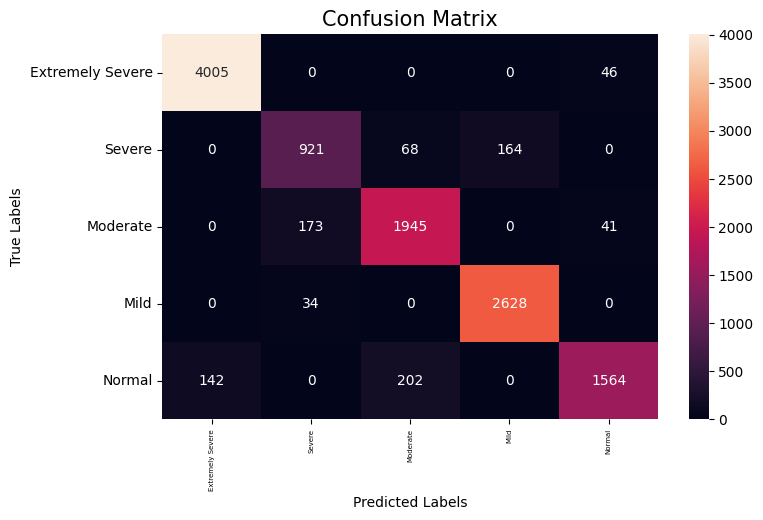

In [ ]:
#Confusion matrix
cm = confusion_matrix(dp_Y_Test, dp_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()
ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(dp_Y_Test, dp_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.97      0.99      0.98      4051
          Severe(1)       0.82      0.80      0.81      1153
        Moderate(2)       0.88      0.90      0.89      2159
            Mild(3)       0.94      0.99      0.96      2662
          Normal(4)       0.95      0.82      0.88      1908

           accuracy                           0.93     11933
          macro avg       0.91      0.90      0.90     11933
       weighted avg       0.93      0.93      0.93     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(dp_Y_Test, dp_predictions)
precision = precision_score(dp_Y_Test, dp_predictions, average='macro')
recall = recall_score(dp_Y_Test, dp_predictions, average='macro')
f1 = f1_score(dp_Y_Test, dp_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 93
Precision: 91
Recall: 90
F1-score: 90


Model training on Stress dataset

In [ ]:
#Training the model on depression dataset
k_model = KNeighborsClassifier(n_neighbors=10)
k_model.fit(st_X_Train, st_Y_Train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
st_predictions = k_model.predict(st_X_Test)

In [ ]:
st_predictions

array([2, 2, 0, ..., 0, 3, 3])

[[1669    0    0    0   16]
 [   0 1242  112  132    0]
 [   0  248 2237    0   70]
 [   0  153    0 3470    0]
 [ 236    0  259    0 2089]]


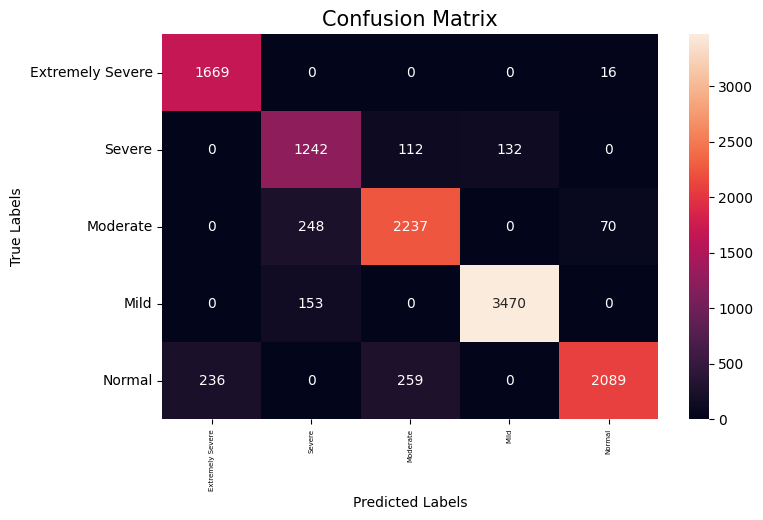

In [ ]:
#Confusion matrix
cm = confusion_matrix(st_Y_Test, st_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(st_Y_Test, st_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.88      0.99      0.93      1685
          Severe(1)       0.76      0.84      0.79      1486
        Moderate(2)       0.86      0.88      0.87      2555
            Mild(3)       0.96      0.96      0.96      3623
          Normal(4)       0.96      0.81      0.88      2584

           accuracy                           0.90     11933
          macro avg       0.88      0.89      0.89     11933
       weighted avg       0.90      0.90      0.90     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(st_Y_Test, st_predictions)
precision = precision_score(st_Y_Test, st_predictions, average='macro')
recall = recall_score(st_Y_Test, st_predictions, average='macro')
f1 = f1_score(st_Y_Test, st_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 90
Precision: 88
Recall: 89
F1-score: 89


Model training on Anxiety dataset

In [ ]:
k_model = KNeighborsClassifier(n_neighbors=10)
k_model.fit(ax_X_Train, ax_Y_Train)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
ax_predictions = k_model.predict(ax_X_Test)

In [ ]:
ax_predictions

array([2, 0, 0, ..., 0, 3, 3])

[[4044    0    0    0  116]
 [   0  362   59  414    0]
 [   0  264 1795   39   43]
 [   0   22    0 2937    0]
 [ 120    0  442    0 1276]]


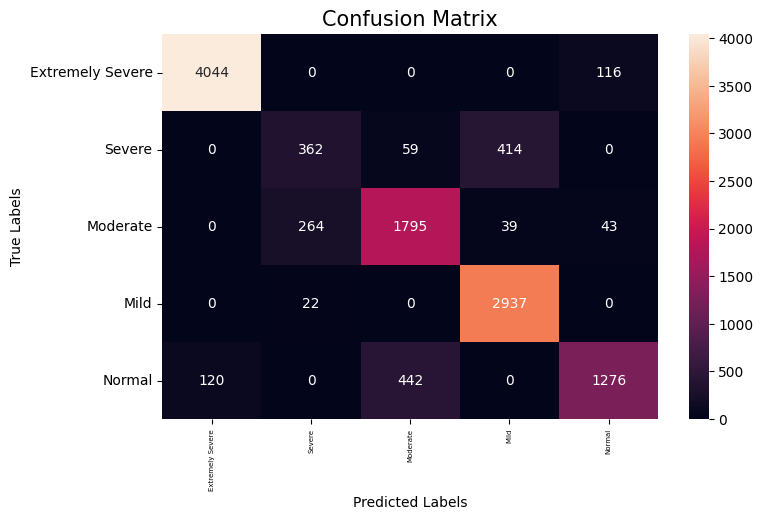

In [ ]:
#Confusion matrix
cm = confusion_matrix(ax_Y_Test, ax_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(ax_Y_Test, ax_predictions)
precision = precision_score(ax_Y_Test, ax_predictions, average='macro')
recall = recall_score(ax_Y_Test, ax_predictions, average='macro')
f1 = f1_score(ax_Y_Test, ax_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 87
Precision: 81
Recall: 79
F1-score: 79


SVM MODEL

Model training on Depression dataset

In [ ]:
#Training the model on depression dataset
svm_model = SVC(C = 10, kernel = 'rbf', gamma= 0.2, random_state=24)
svm_model.fit(dp_X_Train, dp_Y_Train)

SVC(C=10, gamma=0.2, random_state=24)

In [ ]:
dp_predictions = svm_model.predict(dp_X_Test)

In [ ]:
dp_predictions

array([2, 4, 4, ..., 0, 3, 3])

[[4031    0    0    0   20]
 [   0 1128   22    3    0]
 [   0   10 2130    0   19]
 [   0   11    0 2651    0]
 [   7    0   19    0 1882]]


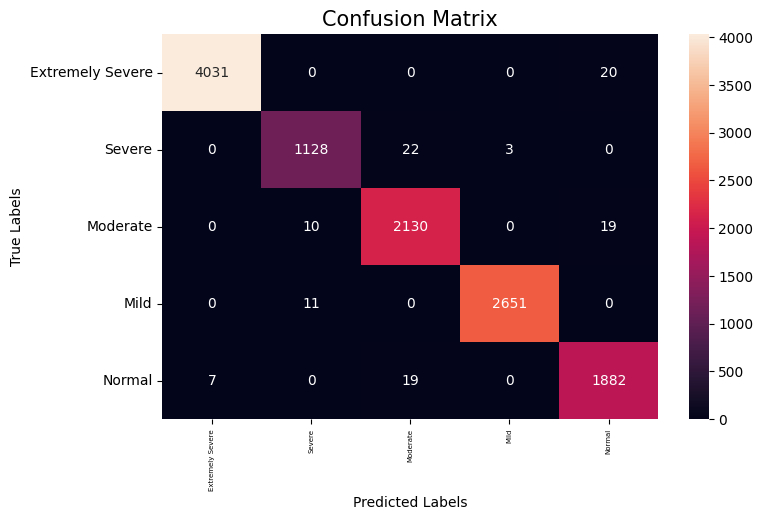

In [ ]:
#Confusion matrix
cm = confusion_matrix(dp_Y_Test, dp_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(dp_Y_Test, dp_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       1.00      1.00      1.00      4051
          Severe(1)       0.98      0.98      0.98      1153
        Moderate(2)       0.98      0.99      0.98      2159
            Mild(3)       1.00      1.00      1.00      2662
          Normal(4)       0.98      0.99      0.98      1908

           accuracy                           0.99     11933
          macro avg       0.99      0.99      0.99     11933
       weighted avg       0.99      0.99      0.99     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(dp_Y_Test, dp_predictions)
precision = precision_score(dp_Y_Test, dp_predictions, average='macro')
recall = recall_score(dp_Y_Test, dp_predictions, average='macro')
f1 = f1_score(dp_Y_Test, dp_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 99
Precision: 99
Recall: 99
F1-score: 99


Model training on Stress dataset

In [ ]:
#Training the model on stress dataset
svm_model = SVC(C = 10, kernel = 'rbf', gamma= 0.2, random_state=24)
svm_model.fit(st_X_Train, st_Y_Train)

SVC(C=10, gamma=0.2, random_state=24)

In [ ]:
st_predictions = svm_model.predict(st_X_Test)

In [ ]:
st_predictions

array([2, 2, 4, ..., 0, 3, 3])

[[1665    0    0    0   20]
 [   0 1449   28    9    0]
 [   0   13 2523    0   19]
 [   0   26    0 3597    0]
 [   6    0   23    0 2555]]


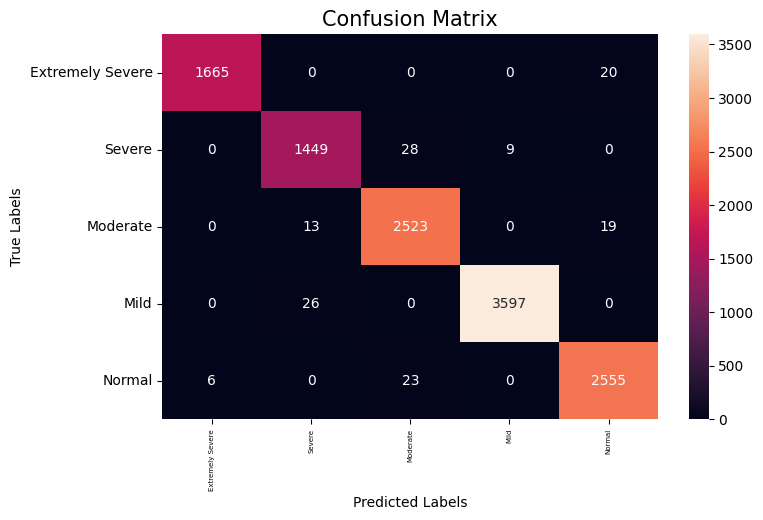

In [ ]:
#Confusion matrix
cm = confusion_matrix(st_Y_Test, st_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(st_Y_Test, st_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       1.00      0.99      0.99      1685
          Severe(1)       0.97      0.98      0.97      1486
        Moderate(2)       0.98      0.99      0.98      2555
            Mild(3)       1.00      0.99      1.00      3623
          Normal(4)       0.98      0.99      0.99      2584

           accuracy                           0.99     11933
          macro avg       0.99      0.99      0.99     11933
       weighted avg       0.99      0.99      0.99     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(st_Y_Test, st_predictions)
precision = precision_score(st_Y_Test, st_predictions, average='macro')
recall = recall_score(st_Y_Test, st_predictions, average='macro')
f1 = f1_score(st_Y_Test, st_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 99
Precision: 99
Recall: 99
F1-score: 99


Model training on Anxiety dataset

In [ ]:
#Training the model on depression dataset
svm_model = SVC(C = 10, kernel = 'rbf', gamma= 0.2, random_state=24)
svm_model.fit(ax_X_Train, ax_Y_Train)

SVC(C=10, gamma=0.2, random_state=24)

In [ ]:
ax_predictions = svm_model.predict(ax_X_Test)

In [ ]:
ax_predictions

array([2, 0, 0, ..., 0, 3, 3])

[[4142    0    0    0   18]
 [   0  811   21    3    0]
 [   0    5 2096    0   40]
 [   0    3    0 2956    0]
 [  34    0   18    0 1786]]


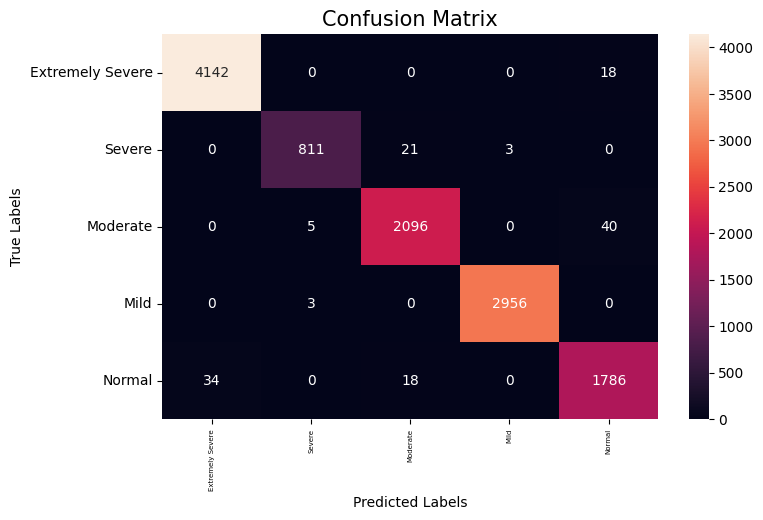

In [ ]:
#Confusion matrix
cm = confusion_matrix(ax_Y_Test, ax_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(ax_Y_Test, ax_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.99      1.00      0.99      4160
          Severe(1)       0.99      0.97      0.98       835
        Moderate(2)       0.98      0.98      0.98      2141
            Mild(3)       1.00      1.00      1.00      2959
          Normal(4)       0.97      0.97      0.97      1838

           accuracy                           0.99     11933
          macro avg       0.99      0.98      0.98     11933
       weighted avg       0.99      0.99      0.99     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(ax_Y_Test, ax_predictions)
precision = precision_score(ax_Y_Test, ax_predictions, average='macro')
recall = recall_score(ax_Y_Test, ax_predictions, average='macro')
f1 = f1_score(ax_Y_Test, ax_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 99
Precision: 99
Recall: 98
F1-score: 98


Random Forest Model

Model training on Depression dataset

In [ ]:
#Training the model on depression dataset
rf_model = RandomForestClassifier(random_state = 30)
rf_model.fit(dp_X_Train, dp_Y_Train)

RandomForestClassifier(random_state=30)

In [ ]:
dp_predictions = rf_model.predict(dp_X_Test)

In [ ]:
dp_predictions

array([2, 4, 2, ..., 0, 3, 3])

[[3935    0    0    0  116]
 [   0  868  130  155    0]
 [   0   97 1987    0   75]
 [   0   56    0 2606    0]
 [  90    0  141    0 1677]]


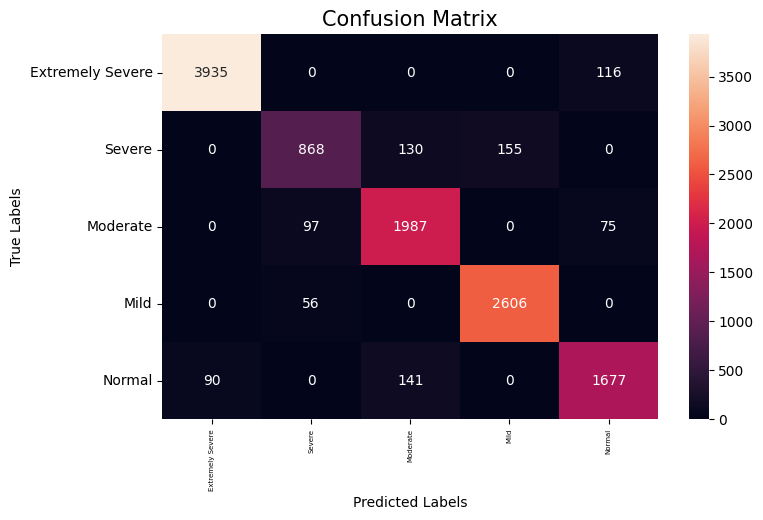

In [ ]:
#Confusion matrix
cm = confusion_matrix(dp_Y_Test, dp_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(dp_Y_Test, dp_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.98      0.97      0.97      4051
          Severe(1)       0.85      0.75      0.80      1153
        Moderate(2)       0.88      0.92      0.90      2159
            Mild(3)       0.94      0.98      0.96      2662
          Normal(4)       0.90      0.88      0.89      1908

           accuracy                           0.93     11933
          macro avg       0.91      0.90      0.90     11933
       weighted avg       0.93      0.93      0.93     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(dp_Y_Test, dp_predictions)
precision = precision_score(dp_Y_Test, dp_predictions, average='macro')
recall = recall_score(dp_Y_Test, dp_predictions, average='macro')
f1 = f1_score(dp_Y_Test, dp_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 93
Precision: 91
Recall: 90
F1-score: 90


Model training on Stress dataset

In [ ]:
#Training the model on stress dataset
rf_model = RandomForestClassifier(random_state=24)
rf_model.fit(st_X_Train, st_Y_Train)

RandomForestClassifier(random_state=24)

In [ ]:
st_predictions = rf_model.predict(st_X_Test)

In [ ]:
st_predictions

array([2, 2, 4, ..., 0, 3, 3])

[[1593    0    0    0   92]
 [   0 1110  211  165    0]
 [   0   96 2338    0  121]
 [   0  132    1 3490    0]
 [  50    0  173    0 2361]]


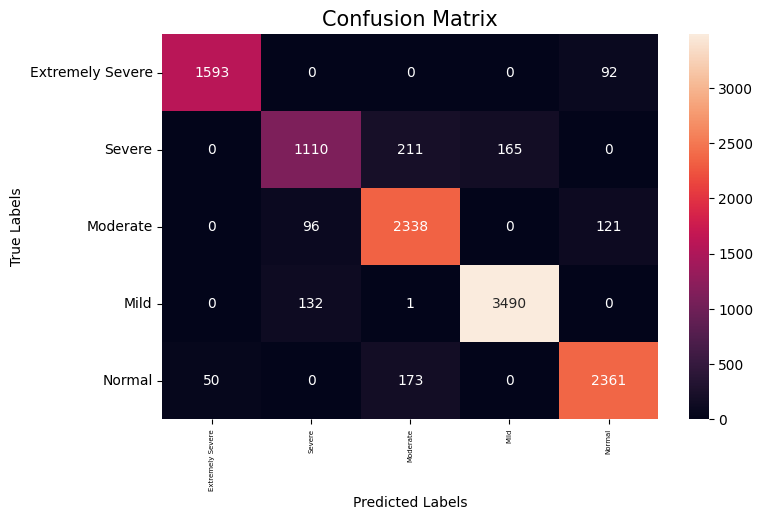

In [ ]:
#Confusion matrix
cm = confusion_matrix(st_Y_Test, st_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(st_Y_Test, st_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.97      0.95      0.96      1685
          Severe(1)       0.83      0.75      0.79      1486
        Moderate(2)       0.86      0.92      0.89      2555
            Mild(3)       0.95      0.96      0.96      3623
          Normal(4)       0.92      0.91      0.92      2584

           accuracy                           0.91     11933
          macro avg       0.91      0.90      0.90     11933
       weighted avg       0.91      0.91      0.91     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(st_Y_Test, st_predictions)
precision = precision_score(st_Y_Test, st_predictions, average='macro')
recall = recall_score(st_Y_Test, st_predictions, average='macro')
f1 = f1_score(st_Y_Test, st_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 91
Precision: 91
Recall: 90
F1-score: 90


Model training on Anxiety dataset

In [ ]:
#Training the model on depression dataset
rf_model = RandomForestClassifier(random_state=24)
rf_model.fit(ax_X_Train, ax_Y_Train)

RandomForestClassifier(random_state=24)

In [ ]:
ax_predictions = rf_model.predict(ax_X_Test)

In [ ]:
ax_predictions

array([2, 0, 0, ..., 0, 3, 3])

[[4001    0    0    0  159]
 [   0  320  224  291    0]
 [   0  117 1879   26  119]
 [   0   34    0 2925    0]
 [ 145    0  272    0 1421]]


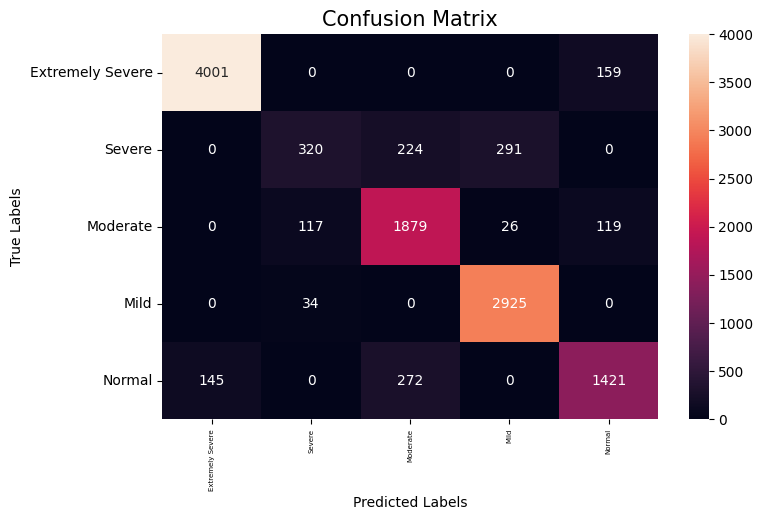

In [ ]:
#Confusion matrix
cm = confusion_matrix(ax_Y_Test, ax_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(ax_Y_Test, ax_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.97      0.96      0.96      4160
          Severe(1)       0.68      0.38      0.49       835
        Moderate(2)       0.79      0.88      0.83      2141
            Mild(3)       0.90      0.99      0.94      2959
          Normal(4)       0.84      0.77      0.80      1838

           accuracy                           0.88     11933
          macro avg       0.83      0.80      0.81     11933
       weighted avg       0.88      0.88      0.88     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(ax_Y_Test, ax_predictions)
precision = precision_score(ax_Y_Test, ax_predictions, average='macro')
recall = recall_score(ax_Y_Test, ax_predictions, average='macro')
f1 = f1_score(ax_Y_Test, ax_predictions, average='macro')


# Print the evaluation metrics

print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 88
Precision: 83
Recall: 80
F1-score: 81


Decision Tree Model

Model training on Depression dataset

In [ ]:
#Training the model on depression dataset
dt_model = DecisionTreeClassifier(random_state = 30, max_depth=20)
dt_model.fit(dp_X_Train, dp_Y_Train)

DecisionTreeClassifier(max_depth=20, random_state=30)

In [ ]:
dp_predictions = dt_model.predict(dp_X_Test)

In [ ]:
dp_predictions

array([2, 2, 4, ..., 0, 3, 3])

[[3764    0    5    0  282]
 [   0  722  218  212    1]
 [   5  282 1623   16  233]
 [   0  168    7 2487    0]
 [ 279    8  315    0 1306]]


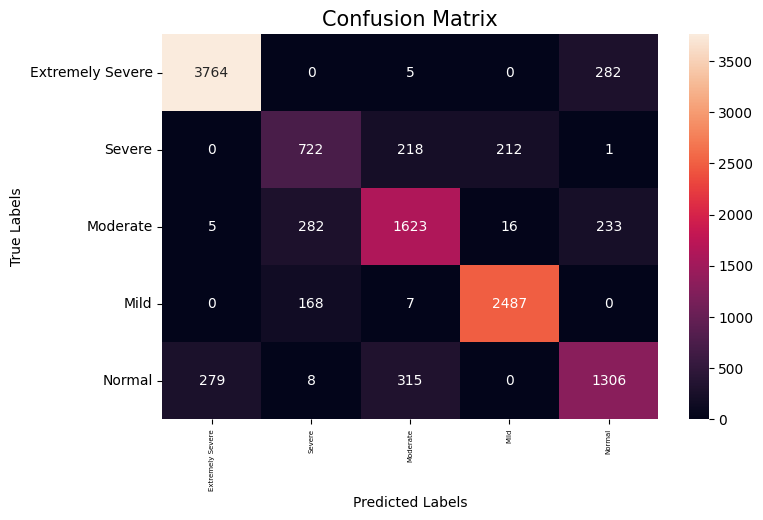

In [ ]:
#Confusion matrix
cm = confusion_matrix(dp_Y_Test, dp_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(dp_Y_Test, dp_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.93      0.93      0.93      4051
          Severe(1)       0.61      0.63      0.62      1153
        Moderate(2)       0.75      0.75      0.75      2159
            Mild(3)       0.92      0.93      0.93      2662
          Normal(4)       0.72      0.68      0.70      1908

           accuracy                           0.83     11933
          macro avg       0.78      0.79      0.78     11933
       weighted avg       0.83      0.83      0.83     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(dp_Y_Test, dp_predictions)
precision = precision_score(dp_Y_Test, dp_predictions, average='macro')
recall = recall_score(dp_Y_Test, dp_predictions, average='macro')
f1 = f1_score(dp_Y_Test, dp_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 83
Precision: 78
Recall: 79
F1-score: 78


Model training on Stress dataset

In [ ]:
#Training the model on stress dataset
dt_model = DecisionTreeClassifier(random_state = 30, max_depth=20)
dt_model.fit(st_X_Train, st_Y_Train)

DecisionTreeClassifier(max_depth=20, random_state=30)

In [ ]:
st_predictions = dt_model.predict(st_X_Test)

In [ ]:
st_predictions

array([2, 2, 0, ..., 0, 3, 3])

[[1481    0    1    0  203]
 [   0  886  312  282    6]
 [   3  348 1787   33  384]
 [   0  301   30 3292    0]
 [ 244    5  420    0 1915]]


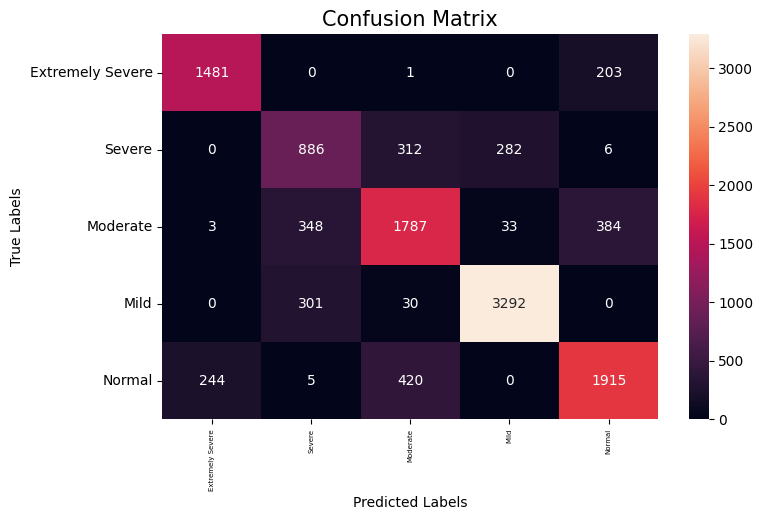

In [ ]:
#Confusion matrix
cm = confusion_matrix(st_Y_Test, st_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(st_Y_Test, st_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.86      0.88      0.87      1685
          Severe(1)       0.58      0.60      0.59      1486
        Moderate(2)       0.70      0.70      0.70      2555
            Mild(3)       0.91      0.91      0.91      3623
          Normal(4)       0.76      0.74      0.75      2584

           accuracy                           0.78     11933
          macro avg       0.76      0.76      0.76     11933
       weighted avg       0.79      0.78      0.78     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(st_Y_Test, st_predictions)
precision = precision_score(st_Y_Test, st_predictions, average='macro')
recall = recall_score(st_Y_Test, st_predictions, average='macro')
f1 = f1_score(st_Y_Test, st_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 78
Precision: 76
Recall: 76
F1-score: 76


Model training on Anxiety dataset

In [ ]:
#Training the model on depression dataset
dt_model = DecisionTreeClassifier(random_state = 30, max_depth=20)
dt_model.fit(ax_X_Train, ax_Y_Train)

DecisionTreeClassifier(max_depth=20, random_state=30)

In [ ]:
ax_predictions = dt_model.predict(ax_X_Test)

In [ ]:
ax_predictions

array([1, 0, 0, ..., 0, 3, 3])

[[3716    0   28    0  416]
 [   0  359  231  236    9]
 [  21  378 1330   75  337]
 [   0  183   38 2738    0]
 [ 309   21  426    0 1082]]


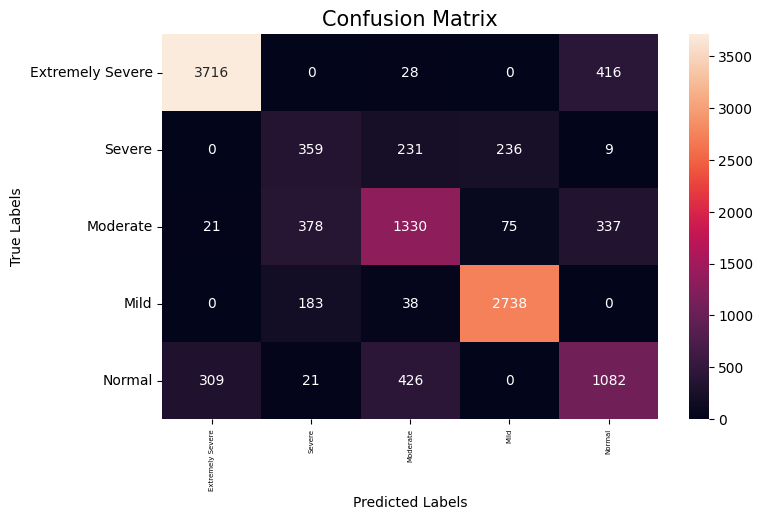

In [ ]:
#Confusion matrix
cm = confusion_matrix(ax_Y_Test, ax_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(ax_Y_Test, ax_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.92      0.89      0.91      4160
          Severe(1)       0.38      0.43      0.40       835
        Moderate(2)       0.65      0.62      0.63      2141
            Mild(3)       0.90      0.93      0.91      2959
          Normal(4)       0.59      0.59      0.59      1838

           accuracy                           0.77     11933
          macro avg       0.69      0.69      0.69     11933
       weighted avg       0.78      0.77      0.77     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(ax_Y_Test, ax_predictions)
precision = precision_score(ax_Y_Test, ax_predictions, average='macro')
recall = recall_score(ax_Y_Test, ax_predictions, average='macro')
f1 = f1_score(ax_Y_Test, ax_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 77
Precision: 69
Recall: 69
F1-score: 69


Naive Bayes Model

Model training on Depression dataset



In [ ]:
#Training the model on depression dataset
nb_model = GaussianNB()
nb_model.fit(dp_X_Train, dp_Y_Train)

GaussianNB()

In [ ]:
dp_predictions = nb_model.predict(dp_X_Test)

In [ ]:
dp_predictions

array([2, 4, 2, ..., 0, 3, 3])

[[3455    0    0    0  596]
 [   0 1001  152    0    0]
 [   0  177 1877    0  105]
 [   0  364    3 2295    0]
 [   0    0   91    0 1817]]


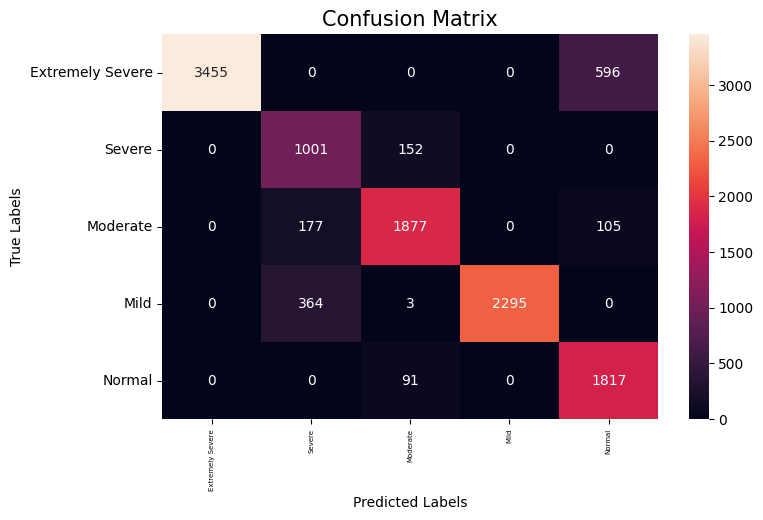

In [ ]:
#Confusion matrix
cm = confusion_matrix(dp_Y_Test, dp_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(dp_Y_Test, dp_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       1.00      0.85      0.92      4051
          Severe(1)       0.65      0.87      0.74      1153
        Moderate(2)       0.88      0.87      0.88      2159
            Mild(3)       1.00      0.86      0.93      2662
          Normal(4)       0.72      0.95      0.82      1908

           accuracy                           0.88     11933
          macro avg       0.85      0.88      0.86     11933
       weighted avg       0.90      0.88      0.88     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(dp_Y_Test, dp_predictions)
precision = precision_score(dp_Y_Test, dp_predictions, average='macro')
recall = recall_score(dp_Y_Test, dp_predictions, average='macro')
f1 = f1_score(dp_Y_Test, dp_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 88
Precision: 85
Recall: 88
F1-score: 86


Model training on Stress dataset

In [ ]:
#Training the model on stress dataset
nb_model = GaussianNB()
nb_model.fit(st_X_Train, st_Y_Train)

GaussianNB()

In [ ]:
st_predictions = nb_model.predict(st_X_Test)

In [ ]:
st_predictions

array([2, 4, 4, ..., 0, 3, 3])

[[1434    0    0    0  251]
 [   0 1256  230    0    0]
 [   0  120 2371    0   64]
 [   0  484    3 3136    0]
 [  52    0  133    0 2399]]


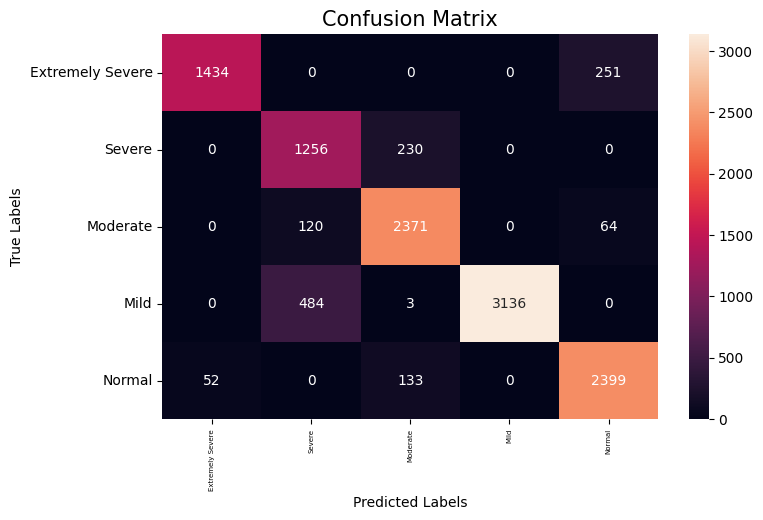

In [ ]:
#Confusion matrix
cm = confusion_matrix(st_Y_Test, st_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(st_Y_Test, st_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       0.97      0.85      0.90      1685
          Severe(1)       0.68      0.85      0.75      1486
        Moderate(2)       0.87      0.93      0.90      2555
            Mild(3)       1.00      0.87      0.93      3623
          Normal(4)       0.88      0.93      0.91      2584

           accuracy                           0.89     11933
          macro avg       0.88      0.88      0.88     11933
       weighted avg       0.90      0.89      0.89     11933



In [ ]:
 #Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(st_Y_Test, st_predictions)
precision = precision_score(st_Y_Test, st_predictions, average='macro')
recall = recall_score(st_Y_Test, st_predictions, average='macro')
f1 = f1_score(st_Y_Test, st_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 89
Precision: 88
Recall: 88
F1-score: 88


Model training on Anxiety dataset



In [ ]:
#Training the model on depression dataset
nb_model = GaussianNB()
nb_model.fit(ax_X_Train, ax_Y_Train)

GaussianNB()

In [ ]:
ax_predictions = nb_model.predict(ax_X_Test)

In [ ]:
ax_predictions

array([4, 0, 0, ..., 0, 3, 1])

[[3565    0    0    0  595]
 [   0  431  316   84    4]
 [   0  110 1818    0  213]
 [   0  290   64 2603    2]
 [   4    0  290    0 1544]]


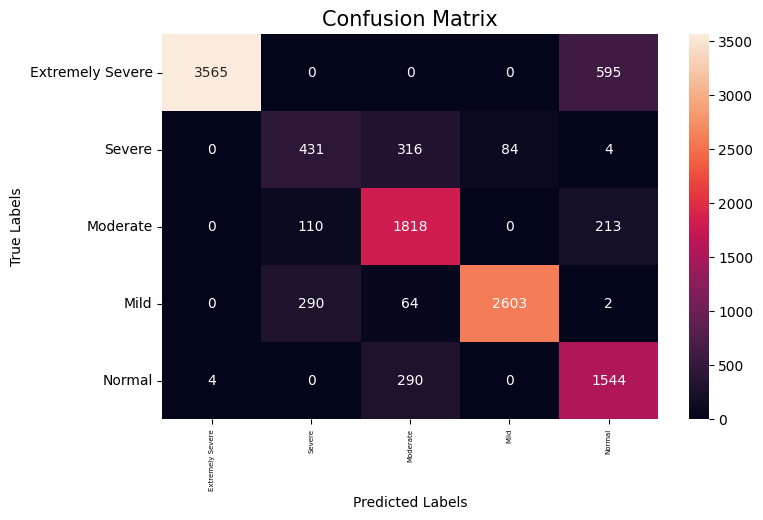

In [ ]:
#Confusion matrix
cm = confusion_matrix(ax_Y_Test, ax_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('KNN Depression.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(ax_Y_Test, ax_predictions, target_names = ['Extremely Severe(0)', 'Severe(1)', 'Moderate(2)', 'Mild(3)', 'Normal(4)']))

                     precision    recall  f1-score   support

Extremely Severe(0)       1.00      0.86      0.92      4160
          Severe(1)       0.52      0.52      0.52       835
        Moderate(2)       0.73      0.85      0.79      2141
            Mild(3)       0.97      0.88      0.92      2959
          Normal(4)       0.65      0.84      0.74      1838

           accuracy                           0.83     11933
          macro avg       0.77      0.79      0.78     11933
       weighted avg       0.86      0.83      0.84     11933



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(ax_Y_Test, ax_predictions)
precision = precision_score(ax_Y_Test, ax_predictions, average='macro')
recall = recall_score(ax_Y_Test, ax_predictions, average='macro')
f1 = f1_score(ax_Y_Test, ax_predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 83
Precision: 77
Recall: 79
F1-score: 78


Save SVM Model

In [ ]:
# Save the model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

In [ ]:
# Load the saved model
with open('svm_model.pkl', 'rb') as file:
    svm_model = pickle.load(file)